<a href="https://colab.research.google.com/github/ElishevaMedioni/secret_sharing_algo/blob/main/secret_sharing_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Protection of multicast scalable video by secret sharing: simulation results

Professional Seminar in Data Science

Dr Guy Kelman

Protection of multicast scalable video by secret sharing

Elisheva Medioni Amar – 337628390

Hila Avraham - 209290246



In [1]:
import random
from math import ceil
from decimal import Decimal


def reconstruct_secret(shares):
    """
    Combines individual shares (points on graph)
    using Lagrange's interpolation.

    `shares` is a list of points (x, y) belonging to a
    polynomial with a constant of our key.
    """
    sums = Decimal(0)
    for j, share_j in enumerate(shares):
        xj, yj = share_j
        prod = Decimal(1)
        for i, share_i in enumerate(shares):
            xi, _ = share_i
            if i != j:
                prod *= Decimal(xi) / (xi - xj)
        sums += yj * prod

    return int(sums)


def polynom(x, coefficients):
    """
    This generates a single point on the graph of given polynomial
    in `x`. The polynomial is given by the list of `coefficients`.
    """
    point = 0
    for coefficient_index, coefficient_value in enumerate(coefficients[::-1]):
        point += x ** coefficient_index * coefficient_value
    return point


def coeff(t, secret):
    """
    Randomly generate a list of coefficients for a polynomial with
    degree of `t` - 1, whose constant is `secret`.
    """
    coefficients = [random.randrange(0, 256) for _ in range(t - 1)]
    coefficients.append(secret)
    return coefficients


def generate_shares(n, m, secret):
    """
    Split given `secret` into `n` shares with a minimum threshold
    of `m` shares to recover this `secret`, using SSS algorithm.
    """
    coefficients = coeff(m, secret)
    shares = []

    for i in range(1, n + 1):
        x = random.randrange(1, 256)
        shares.append((x, polynom(x, coefficients)))

    return shares


def encrypt(plaintext, key):
    """
    Encrypts the plaintext using a simple XOR encryption algorithm
    with the given key.
    """
    encrypted_text = [char ^ key for char in plaintext]
    return encrypted_text


def decrypt(ciphertext, key):
    """
    Decrypts the ciphertext using a simple XOR encryption algorithm
    with the given key.
    """
    decrypted_text = [char ^ key for char in ciphertext]
    return decrypted_text


In [2]:
def find_quadratic_equation(points):
  if len(points) != 3:
      raise ValueError("Exactly three points are required.")

  x1, y1 = points[0]
  x2, y2 = points[1]
  x3, y3 = points[2]

  denominator = (x1 - x2) * (x1 - x3) * (x2 - x3)
  a = (x3 * (y2 - y1) + x2 * (y1 - y3) + x1 * (y3 - y2)) / denominator
  b = (x3**2 * (y1 - y2) + x2**2 * (y3 - y1) + x1**2 * (y2 - y3)) / denominator
  c = (x2 * x3 * (x2 - x3) * y1 + x3 * x1 * (x3 - x1) * y2 + x1 * x2 * (x1 - x2) * y3) / denominator

  return a, b, c

##The Simulation

In [ ]:
# (3, 5) sharing scheme
t, n = 3, 5
secret = 1234
print(f'Original Secret: {secret}')

# Phase I: Generation of shares
shares = generate_shares(n, t, secret)
print(f'Shares: {", ".join(str(share) for share in shares)}')

# Phase II: Secret Reconstruction
# Picking t shares randomly for reconstruction
pool = random.sample(shares, t)
print(f'Combining shares: {", ".join(str(share) for share in pool)}')
reconstructed_secret = reconstruct_secret(pool)
print(f'Reconstructed secret: {reconstructed_secret}')

# Encryption
plaintext = "Hello, World!"
numerical_plaintext = [ord(char) for char in plaintext]

# Perform encryption
encrypted_text = encrypt(numerical_plaintext, reconstructed_secret)
print("Encrypted Text:", encrypted_text)

# Decryption
decrypted_text = decrypt(encrypted_text, reconstructed_secret)
decrypted_plaintext = ''.join(chr(char) for char in decrypted_text)
print("Decrypted Plaintext:", decrypted_plaintext)

Original Secret: 1234
Shares: (48, 171010), (204, 3014110), (210, 3193444), (138, 1383580), (218, 3440620)
Combining shares: (210, 3193444), (138, 1383580), (218, 3440620)
Reconstructed secret: 1234
Encrypted Text: [1178, 1207, 1214, 1214, 1213, 1278, 1266, 1157, 1213, 1184, 1214, 1206, 1267]
Decrypted Plaintext: Hello, World!


In [5]:
t, n = 3, 5
secret = 1234
print(f'Original Secret: {secret}')

shares = generate_shares(n, t, secret)
print(f'Shares: {", ".join(str(share) for share in shares)}')

pool = random.sample(shares, t)
print(f'Combining shares: {", ".join(str(share) for share in pool)}')
reconstructed_secret = reconstruct_secret(pool)
print(f'Reconstructed secret: {reconstructed_secret}')

# Read content from the txt file
input_file = '/content/sample-2mb-text-file.txt'
with open(input_file, 'r') as file:
    plaintext = file.read()

# Convert plaintext to numerical form
numerical_plaintext = [ord(char) for char in plaintext]

# Perform encryption
encrypted_text = encrypt(numerical_plaintext, reconstructed_secret)

# Write the encrypted content to a new file
output_file = 'encrypted.txt'
with open(output_file, 'w') as file:
    file.write(' '.join(map(str, encrypted_text)))

# Decryption
decrypted_text = decrypt(encrypted_text, reconstructed_secret)
decrypted_plaintext = ''.join(chr(char) for char in decrypted_text)

# Check if encrypted and decrypted texts are the same
if numerical_plaintext == decrypted_text:
    print("Encryption and Decryption Successful!")
else:
    print("Encryption and Decryption Failed!")

# Optionally, save the decrypted plaintext to a file
decrypted_output_file = 'decrypted.txt'
with open(decrypted_output_file, 'w') as file:
    file.write(decrypted_plaintext)


Original Secret: 1234
Shares: (124, 1060318), (37, 98359), (232, 3686554), (178, 2175148), (241, 3977011)
Combining shares: (241, 3977011), (124, 1060318), (178, 2175148)
Reconstructed secret: 1234
Encryption and Decryption Successful!


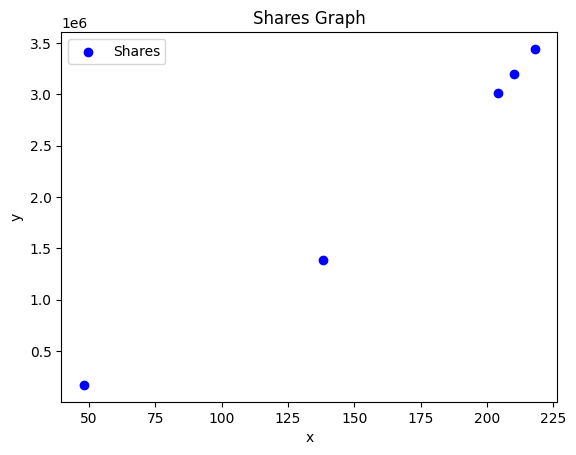

y = 72.00x^2 + 81.00x + 1234.00


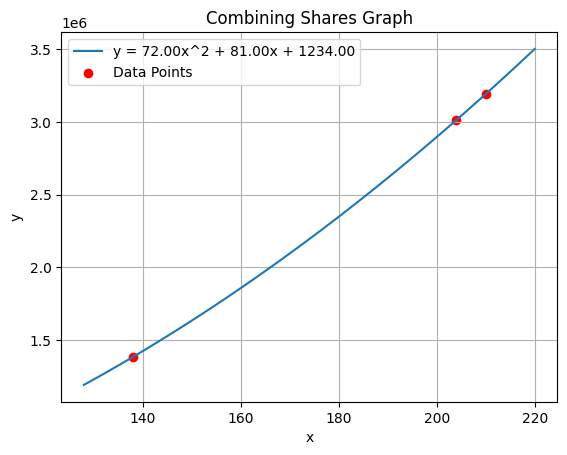

     x        y
0   48   171010
1  204  3014110
2  210  3193444
3  138  1383580
4  218  3440620


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extract x and y values from shares for plotting
x_values = [x for x, _ in shares]
y_values = [y for _, y in shares]

# Plot the shares graph
plt.scatter(x_values, y_values, color='blue', label='Shares')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Shares Graph')
plt.legend()
plt.show()

pool = random.sample(shares, t)
pool_x_values = [x for x, _ in pool]
pool_y_values = [y for _, y in pool]

points = list(zip(pool_x_values, pool_y_values))
a, b, c = find_quadratic_equation(points)  # Unpack the coefficients
equation = f"y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}"
print(equation)

# Plotting the graph
x = np.linspace(min(pool_x_values) - 10, max(pool_x_values) + 10, 100)
y = a * x**2 + b * x + c

plt.plot(x, y, label=equation)
plt.scatter(pool_x_values, pool_y_values, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Combining Shares Graph')
plt.show()

# Create a table with x and y values of the shares
table_data = {'x': x_values, 'y': y_values}
df = pd.DataFrame(table_data)
print(df)